<a href="https://colab.research.google.com/github/Tiger-A/Yandex_Data-Science/blob/master/sum_pj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортирую библиотеку __``Pandas``__ и создаю DataFrame с названием __``df``__, которому присвою значение загруженного датасета с помощью метода __``.read_csv()``

In [1]:
import pandas as pd
import numpy as np
from textwrap import dedent
from IPython import get_ipython
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
sns.set_theme()

In [2]:
url = 'https://raw.githubusercontent.com/Tiger-A/Yandex_Data-Science/master/pjs1/datasets/games.csv'

<a id="num1"></a>
## Шаг 1. Изучение входных данных

In [3]:
df = pd.read_csv(url)
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Проверем пропущенные значения:

In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Шаг 2. Подготовьте данные
Замените названия столбцов (приведите к нижнему регистру);
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

#### Проанализировав полученную таблицу, можно выделить следующие проблемы:
* Столбец __'Name'__   имеет пропущенные значения
* Столбец __'Platform'__ не имеет пропущенные значения
* Столбец __'Year_of_Release'__ имеет пропущенные значения
* Столбец __'Genre'__ имеет пропущенные значения
* Столбец __'NA_sales'__  не имеет пропущенные значения
* Столбец __'EU_sales'__ не имеет пропущенные значения
* Столбец __'JP_sales'__ не имеет пропущенные значения
* Столбец __'Other_sales'__ не имеет пропущенные значения
* Столбец __'Critic_Score'__ имеет пропущенные значения
* Столбец __'User_Score'__  имеет пропущенные значения
* Столбец __'Rating'__ имеет пропущенные значения



df.columns    # Вывожу список заголовков таблицы 'df'

In [6]:
df.columns    # Вывожу список заголовков таблицы 'df'

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

2.1. Заменим названия столбцов (приведием к нижнему регистру)

In [7]:
df.rename(columns = {'Name':'name', 'Platform': 'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales',
       'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'},  inplace = True )

      

In [8]:

# df.columns = df.columns.str.lower()

Проверим замену


In [9]:
df.columns 


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

2.2. Преобразуем данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [10]:
df['genre'].unique()


# # изменяем регистр zxttr столбца genre с помощью метода str.lower()
# data['genre'] = data['genre'].str.lower()


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Преобразуем year_of_release в Int64 - значение целочисленное и data нет необходимости использовать.


In [11]:
df['year_of_release'] = df['year_of_release'].astype('Int64')




In [12]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [13]:
df['critic_score'] = df['critic_score'].astype('float')




In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [15]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [18]:
df['user_score'].unique()
# df['year_of_release']

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


В столбце user_score присутствует значение tbd. Выше мы воспользовались методом info() и обратили внимание, что формат ячейки object. Хотя судя по общему содержанию, а так же по описанию столбца (оценка пользователей (максимум 10)) тип данных должен быть float. читаю данное значение "безоценочным" и предлагаю заменить на NaN.



In [20]:

df['user_score'] = df['user_score'].replace('tbd', np.NaN)
# проверяем уникальные значения в столбце и тип после преобразования
df['user_score'] = df['user_score'].astype(float)
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Признак name отвечает за название компьютерной игры. заполнить его вычисленным значением невозможно. Оставить его пустым тоже нельзя, т.к. непонятно о какой видеоигре идет речь, поэтому мы принимаем решение удалить эти 2 строки, иначе они повлияют на нашу статистику. Вероятное появление пропуска в ячейке ошибка привыгрузке?
Признак year_of_release предлагаю удалить пропуска, чтобы не было нелогичного установления года выпуска. Пропуск в данном столбце мог возникнуть из-за того, что при заполнении данных об игре забыли указать или точная дата выхода игры точно не определена.
Признак genre так же сложно подвести к какому-либо значению, т.к. необходимо знать конкретную игру. Так же удаляем строки с пустыми значениями. Пропуск в данном столбце мог возникнуть из-за того, что при заполнении данных об игре его забыли указать или не определились к какому именно жанру относится либо жанр определить не кдалось.

In [21]:
# удаляем строки с пустыми значениями в столбцах
df.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True)

In [22]:
# дубликаты
# Дубликаты? Вы нашли что-нибудь? Я лишь заметил, что у нас data.name.duplicated().sum() возвращает 5154 одинаковых названий игр, но это игры выходили на разных платформах. То есть дубликатов нет, несмотря на одинаковые названия

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [24]:
# создадим отдельный датафрейм для проведения общих расчетов
df_sum = df.copy()
# посчитаем суммарные продажи во всех регионах
df_sum['sum_sales'] =  df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
# проверим
df_sum.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31



## Шаг 3. Проведим исследовательский анализ данных

Посмотрим количество игр выпускаемых в разные годы. 

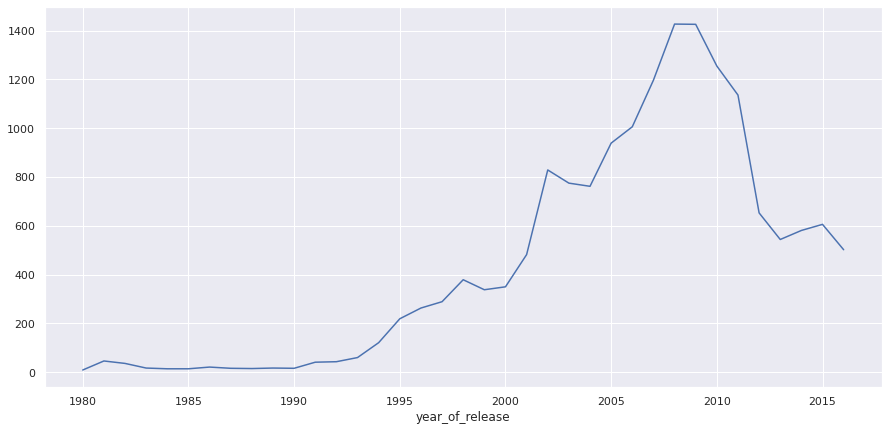

In [25]:
df_sum.groupby('year_of_release')['name'].count().plot(grid=True, figsize=(15, 7))
plt.show()

Посмотрим, как менялись продажи по платформам:

In [26]:
s = df_sum.groupby(['year_of_release', 'platform'])['sum_sales'].sum()
# count_games_1 = data.groupby(['year_of_release', 'platform' ])['name'].count()
# .plot(grid=True, figsize=(15, 7))
s.tail(30)
# .plot(grid=True, figsize=(15, 7))
# plt.show()

year_of_release  platform
2013             XOne         18.96
2014             3DS          43.76
                 PC           13.28
                 PS3          47.76
                 PS4         100.00
                 PSP           0.24
                 PSV          11.90
                 Wii           3.75
                 WiiU         22.03
                 X360         34.74
                 XOne         54.07
2015             3DS          27.78
                 PC            8.52
                 PS3          16.82
                 PS4         118.90
                 PSP           0.12
                 PSV           6.25
                 Wii           1.14
                 WiiU         16.35
                 X360         11.96
                 XOne         60.14
2016             3DS          15.14
                 PC            5.25
                 PS3           3.60
                 PS4          69.25
                 PSV           4.25
                 Wii           0.18
  

Из данной выгрузки мы можем выделить две игровые платформы с наибольшими суммарными продажами Xbox One, PS4, тем самым мы отсеиваем мало продаваемые позиции и устаревшие.

Рассмотрим график продаж по годам в разрезе платформ.

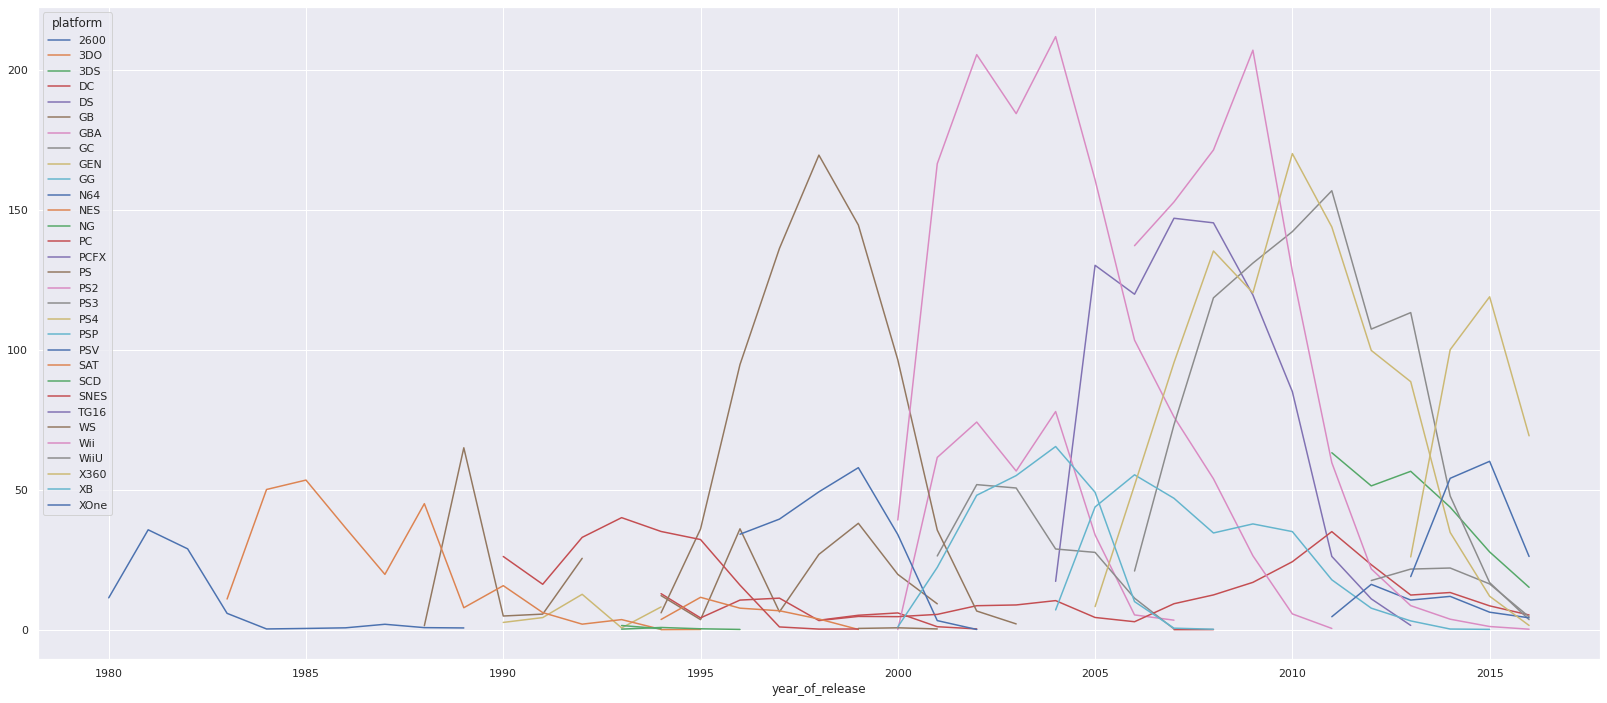

In [27]:
# df_sum[(df_sum['year_of_release'] >= 2014) & (df_sum['year_of_release'] <= 2016)].pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))


# [(df_sum['year_of_release'] >= 2014) & (df_sum['year_of_release'] <= 2016)]

# df_end = df_sum[(df_sum['year_of_release'] >= 2014) & (df_sum['year_of_release'] <= 2016)]

df_sum.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(28, 12))

plt.show()

Из графика видно, что "средний срок жизни" платформы составляет порядка 6-7 лет.

Актуальные период для прогноза на 2017 возьмем с 2015 по 2016 года. 

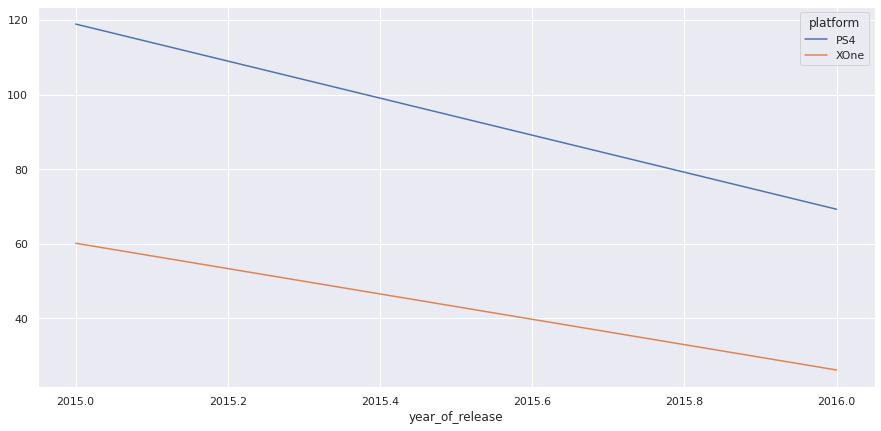

In [28]:

df_sum_an = df_sum[(df_sum['year_of_release'] >= 2015) & (df_sum['year_of_release'] <= 2016) & ((df_sum['platform'] == 'XOne') | (df_sum['platform'] == 'PS4'))]

df_sum_an.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))

plt.show()

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

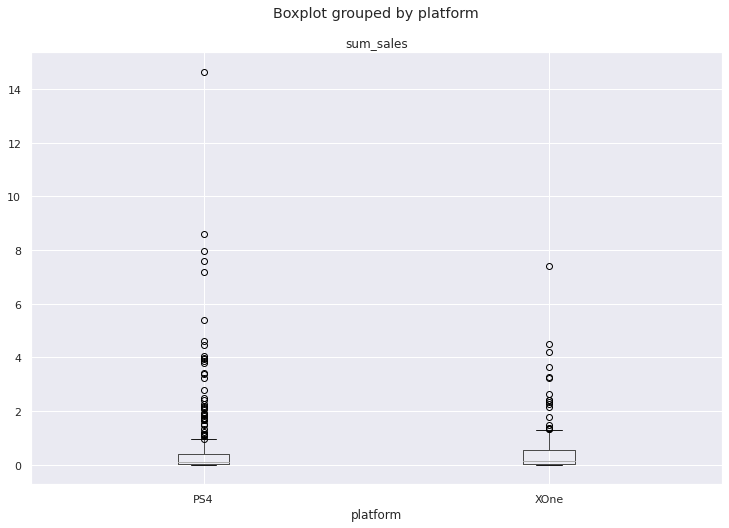

In [29]:
# построим общую диаграмму размаха
df_sum_an.boxplot(column='sum_sales', by='platform', figsize=(12, 8))


plt.show()

На диаграмме размаха просматриваются большое количество частыз выбросов, есть так же и редкие. Возможно это новые игры с большим потенциалом продаж в следующем временном периоде


Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

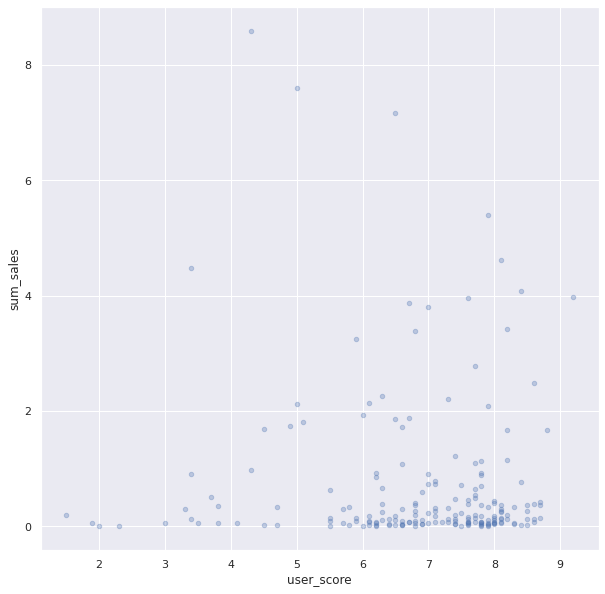

In [30]:
# выведем таблицу рассеивания по платформе PS4, отобразив отзывы пользователей
df_sum_an[df_sum_an['platform']=='PS4'].plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.3, figsize=(10, 10), grid=True)
plt.show()

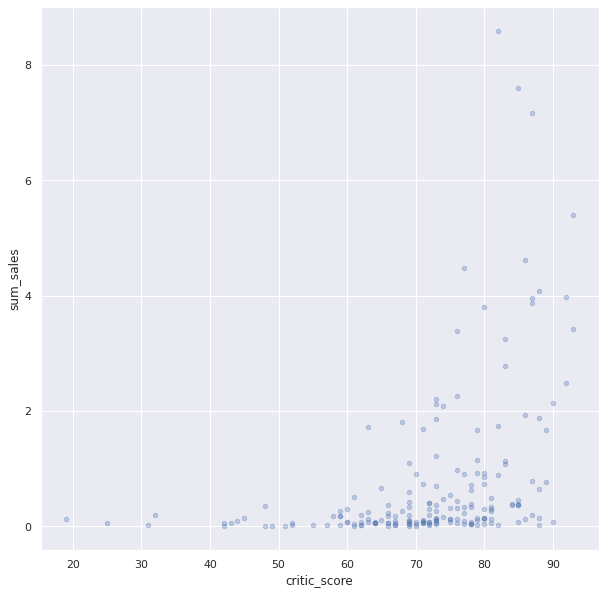

In [31]:
# выведем таблицу рассеивания по платформе PS4, отобразив отзывы критиков:
df_sum_an[df_sum_an['platform']=='PS4'].plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.3, figsize=(10, 10), grid=True)
plt.show()

In [32]:
# вычислим корреляционную матрицу
data_ps4 = df_sum_an[df_sum_an['platform']=='PS4']
data_ps4_cor = data_ps4['user_score'].corr(data_ps4['sum_sales'])
# display('Корреляция слабо положительная: {}'.format(data_ps4_cor))
data_ps4_cor

-0.05973845712638215

In [33]:
# вычислим корреляционную матрицу
data_ps4 = df_sum_an[df_sum_an['platform']=='PS4']

data_ps4_cor = data_ps4['critic_score'].corr(data_ps4['sum_sales'])

data_ps4_cor

0.3928485555130601

Выводы:

Просмотрев соотношение отзывов покупателе и критиков можно сказать, что по данным из диаграммы рассеивания у нас:- слабо отрицательная корреляция -0.040131589472697356 по отзывам покупателей - слабо положительная корреляция 0.40266141068104083 по отзывам критиков

Сравним выводы с продажами игр на других платформах.

In [34]:
df_sum.groupby('platform')['sum_sales'].describe()



,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,116.0,0.745517,0.956160,0.07,0.3075,0.480,0.7800,7.81
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3DS,512.0,0.503535,1.441271,0.01,0.0500,0.120,0.3325,14.60
DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
DS,2121.0,0.378491,1.436042,0.01,0.0500,0.110,0.2700,29.80
GB,97.0,2.622990,5.390925,0.06,0.3000,1.180,2.1800,31.38
GBA,811.0,0.385795,0.899654,0.01,0.0550,0.160,0.3900,15.84
GC,542.0,0.362970,0.693974,0.01,0.0600,0.150,0.3675,7.06
GEN,27.0,1.050000,1.490041,0.03,0.0700,0.150,1.7050,6.02


Построим диаграмму размаха по всем платформам.

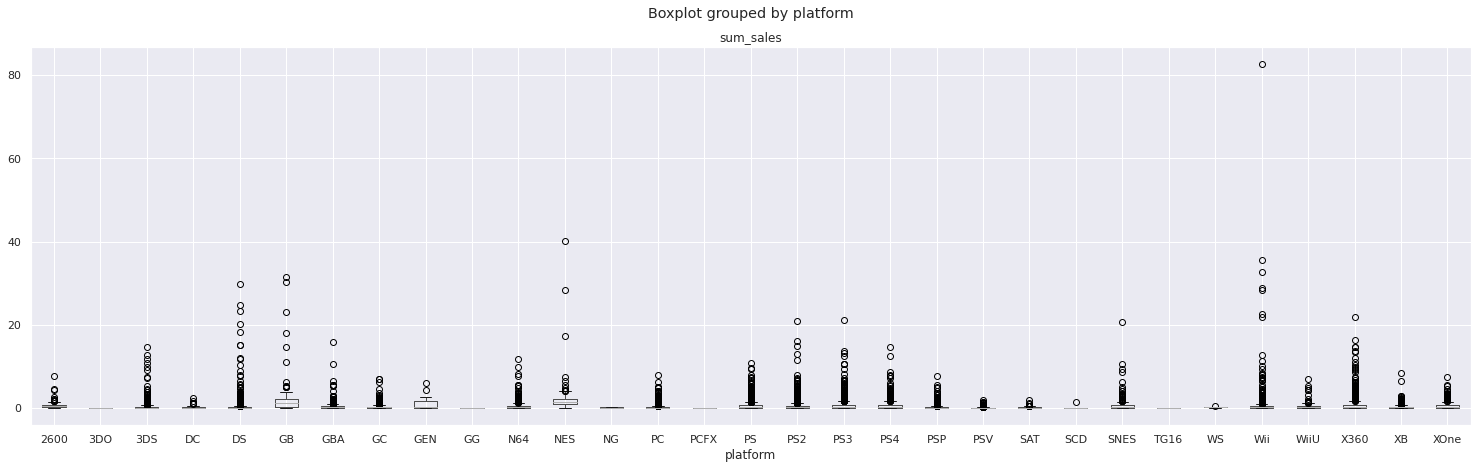

In [35]:
# выводим диаграмму размаха общего плана
df_sum.boxplot(column='sum_sales', by='platform', figsize=(25,7))
plt.show()

Подкорректируем параметры вывода:

Подкорректируем  выбросы и еще раз посмотрим на диаграмму размаха.

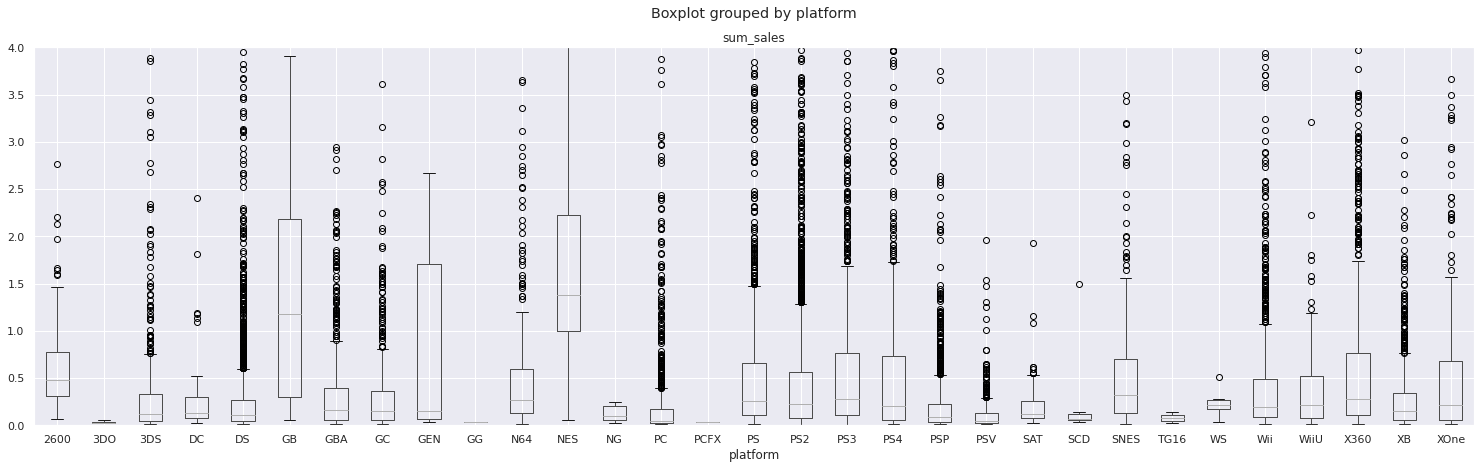

In [36]:
# сужаем диапазон до 3.9 млн продаж
df_sum.boxplot(column='sum_sales', by='platform', figsize=(25,7))
# подгоняем данные по стороне 'Y'
plt.ylim(0, 4)
plt.show()

Выводы:
Сравнивая продажи платформ из нашей выборки с теми, которые не попали в нее, то после просмотра диаграмм размаха с разными диапазонами можем сделать следующие выводы:

Вперед вырываются 3 платформы: PS и PS4 и Xbox One. Границы этих платформ высокие, но при всем при этом медиана у всех платформ, кроме PS и PS3, не выходит за рамки 0.5 млн продаж, т.к. медиана и размах примерно на одном уровне, можно сказать, что у выбранных платформ для анализа,  есть игры, которые обеспечивают намного больше обьем продаж, в отличии от тех, которые не попали в выборку.  




Посмотрим на общее распределение игр по жанрам:


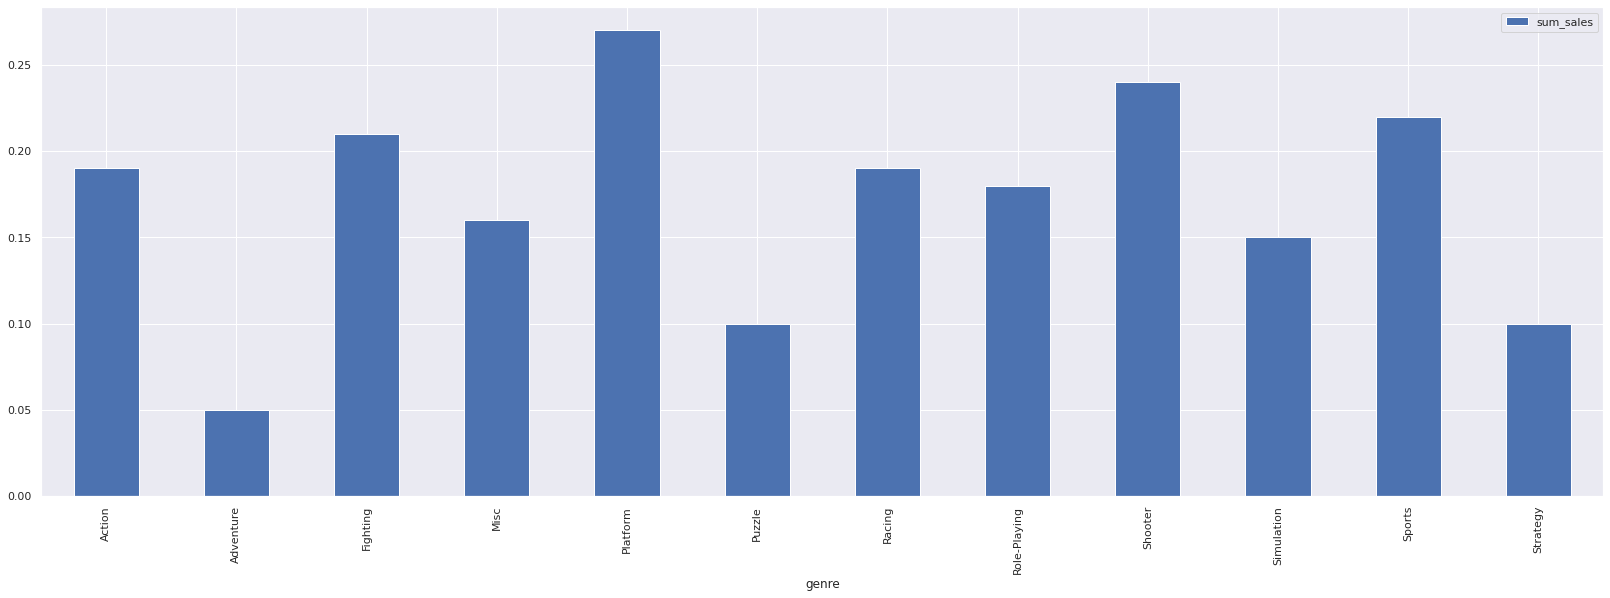

In [37]:

df_sum.pivot_table(index='genre', values='sum_sales', aggfunc='median').plot(kind='bar', figsize=(28,9))
plt.show()

мы можем выделить ТОП-5 жанров:
1. Platform
2. Shooter
3. Sports
4. Fighting
5. Action

ТОП-5 самых непопулярных жанров:
1. Adventure
2. Puzzle
3. Strategy
4. Simulation
5. Misc

Тепреь рассмотрим нашу выборку для анализа, и сравним:

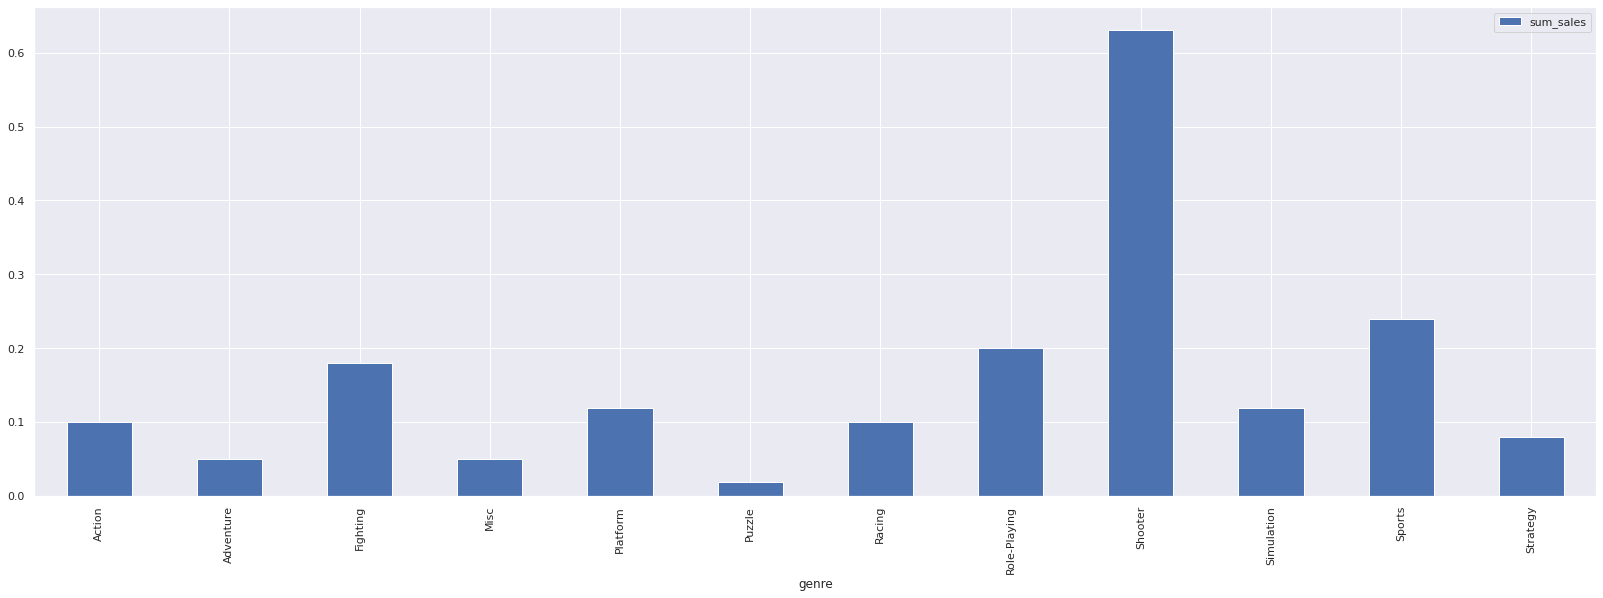

In [38]:

# df_sum_an = df_sum[(df_sum['year_of_release'] >= 2015) & (df_sum['year_of_release'] <= 2016) & ((df_sum['platform'] == 'XOne') | (df_sum['platform'] == 'PS4'))]
df_sum_an.pivot_table(index='genre', values='sum_sales', aggfunc='median').plot(kind='bar', figsize=(28,9))
plt.show()

можем выделить ТОП-5 жанров:
1. Shooter
2. Sports
3. Role-Playing
4. Fighting
5. Platform

ТОП-5 самых непопулярных жанров:
1. Puzzle
2. Adventure
3. Misc
4. Strategy
5. Racing



Вывод

Мы начали наш исследовательский анализ данных с того, что посчитаем количество выпущенных игр с группировкой на года и платформы.
Сделали вывод в какие года выпускалось большего всего игр и взяли этот период для нашей выгрузки. Период с 2015 по 2016 года был установлен исходят из актуальной диагностики в игровой индустрии по сроку жизни платформ.

Для выбранных годов было посчитано суммарное количество продаж по каждой платформе. По изучению суммарных показателей мы можем выделить самые продаваемые платформы с продажами 40 млн и более. 
Выбрали ТОП платформы (PS4 и Xbox One). 
Составили скорректированный датафрейм и оставляем в ней только ТОП позиции.

Были построены графики распределения.

Первый наш график будет показывать актуальность платформ по годам в зависимости от количество проданных игр.
Модели выпускались с периодичностью в год, в некоторых годах выпускало  2 платформы сразу.

Далее мы определили актуальные период, для того чтобы спрогнозировать последующие продажи. С 2006 по 2016 года. Данный период выбран в связи с тем, чтобы мы могла посмотреть какие платформы в принципе не будут продаваться. Если сделать период меньше, то часть данных будет урезана.
По итогам был выявлен лидер продаж платформа - PS4.
Были оставли все выбросы, т.к. они нам важны для дальнейшей аналитики.
Так же нам необходимо посмотреть на примере одной популярной платформы влияют ли отзывы критиков и покупателей на продажи. Просмотрев соотношение отзывов покупателе и критиков можно сказать, что большую часть составляют высокие оценки, а график продаж мы вывели для того, чтобы показать что хорошие оценки покупателей и критиков соотносятся с продолжительными высокими продажами игр данной платформы. 
Так же мы выяснили, что по данным из диаграммы рассеивания у нас: корреляция слабо отрицательная: -0.0652804641386599, по оценкам покупателей корреляция слабо отрицательная: -0.0652804641386599
по оценкам критиков корреляция слабо положительная: 0.3914585293351539
Сравнили показатели со всеми платформами которые выпускали и после вывода финальной диаграммы подвели итоги. 
Сравнили показатели по жанрам и выяснили отличаются ли топовые жанры нашей выгрузки от топовых жанров всех платформ.
Выяснилось следующее:

Жанры Fighting, Shooter, Sports занимают с первого по третье место как в общей выборке, так и в нашей финальной таблице, а вот 4 и 5 места разнятся (в нашей выгрузки это Simulation и Role-Playing)

ТОП-5 самых непопулярных жанров содержит одинаковые жанры, что в общей выгрузке, что в нашей.
ТОП:

Platform

Shooter

Sports

Fighting

Action

ТОП-5 самых непопулярных жанров:

Shooter

Sports

Role-Playing

Fighting

Platform




*** 4. Составим портрет пользователя каждого региона ***

Определим для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). 

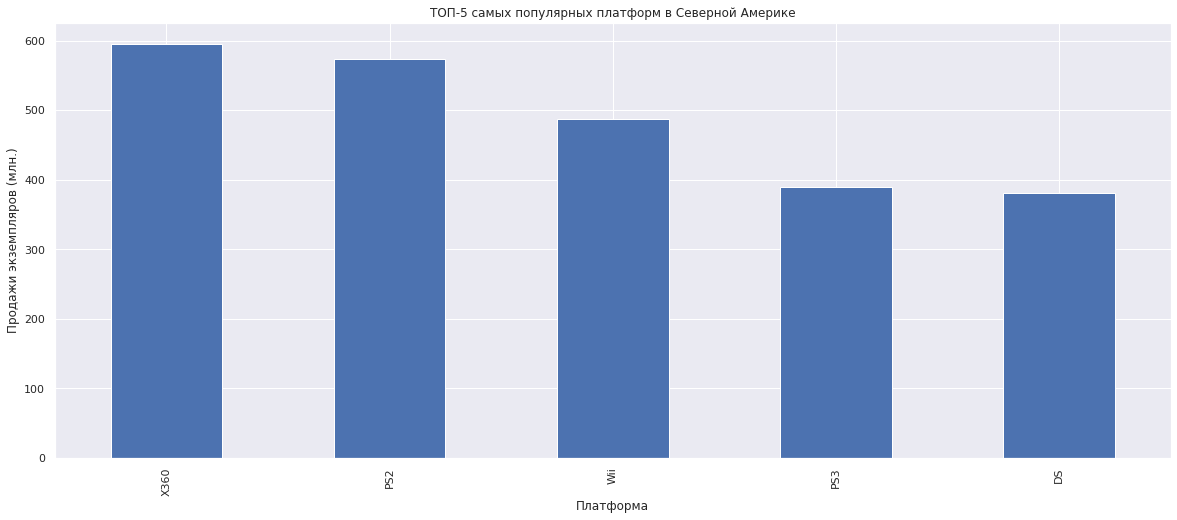

In [39]:
# ТОП-5 самых популярных платформ в NA
# группируем по платформе
platform_na = df_sum.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
# построим гистограмму
platform_na.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Северной Америке')
#  наименование горизонтальной линии ('X')
plt.xlabel('Платформа')
#  наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

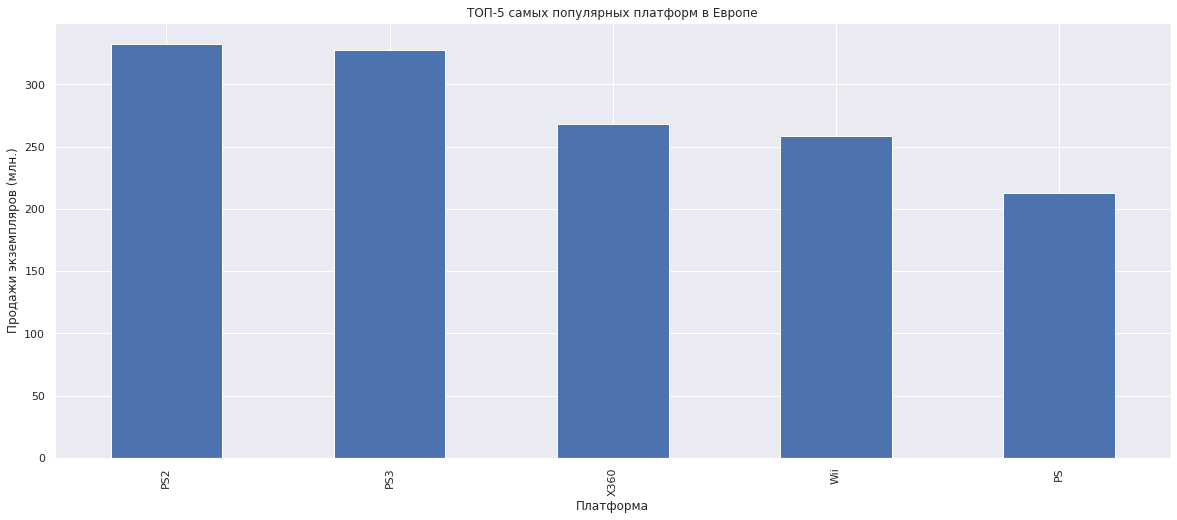

In [40]:
# ТОП-5 самых популярных платформ в EU
# группируем по платформе
platform_eu = df_sum.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
# построим гистограмму
platform_eu.plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Европе')
#  наименование горизонтальной линии ('X')
plt.xlabel('Платформа')
#  наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

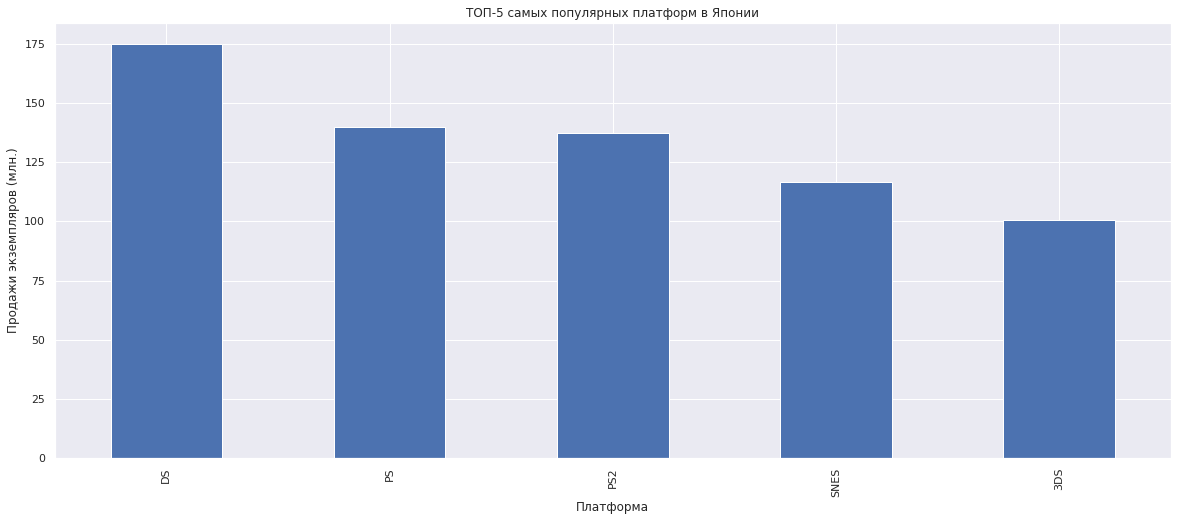

In [41]:
# ТОП-5 самых популярных платформ в JP
# группируем по платформе
platform_jp = df_sum.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
# построим гистограмму
platform_jp.plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Японии')
#  наименование горизонтальной линии ('X')
plt.xlabel('Платформа')
#  наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Рассмотрим продажи  вразрезе жанров:

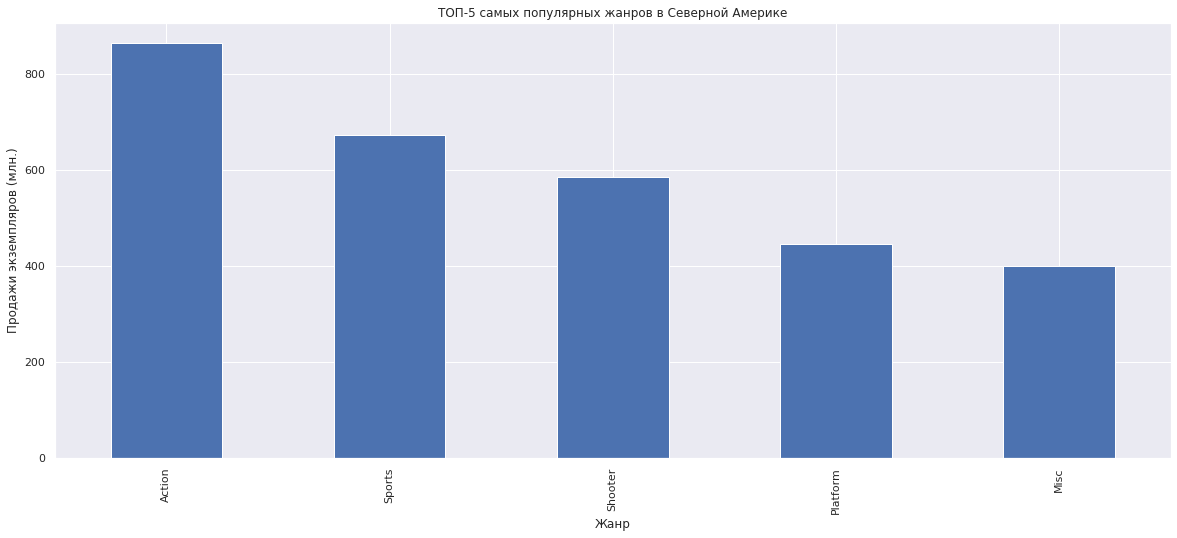

In [42]:
# ТОП-5 самых популярных жанров в Северной Америке
# группируем по жанрам
genre_na = df_sum.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
# построим гистограмму
genre_na.plot(x = 'genre', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Северной Америке')
# меняем наименование горизонтальной линии ('X')
plt.xlabel('Жанр')
# меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

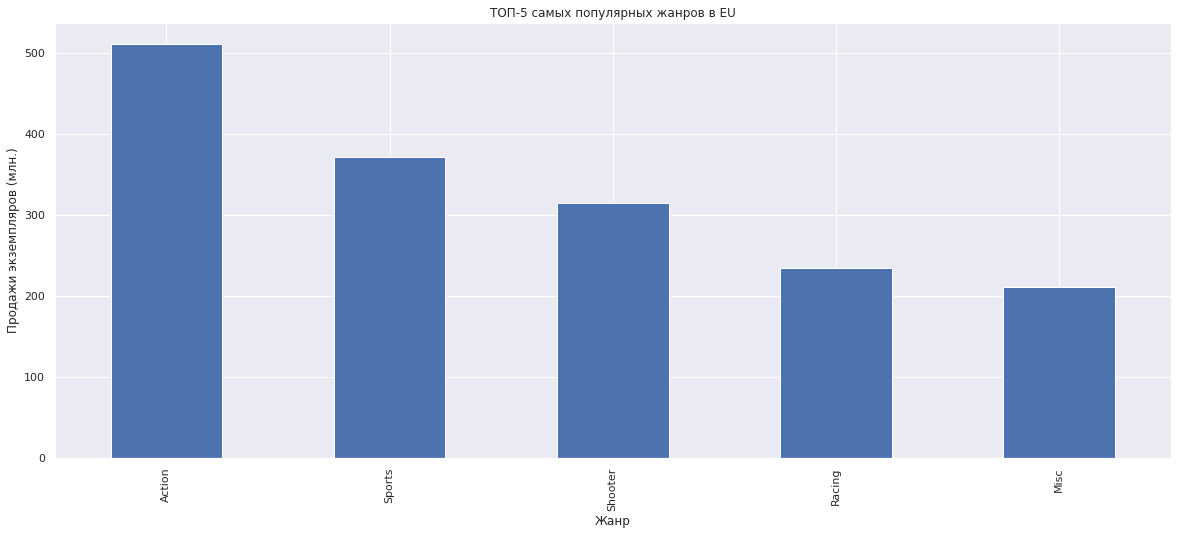

In [43]:
# ТОП-5 самых популярных жанров в Европе
# группируем по жанрам
genre_eu = df_sum.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
# построим гистограмму
genre_eu.plot(x = 'genre', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в EU')
# меняем наименование горизонтальной линии ('X')
plt.xlabel('Жанр')
# меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

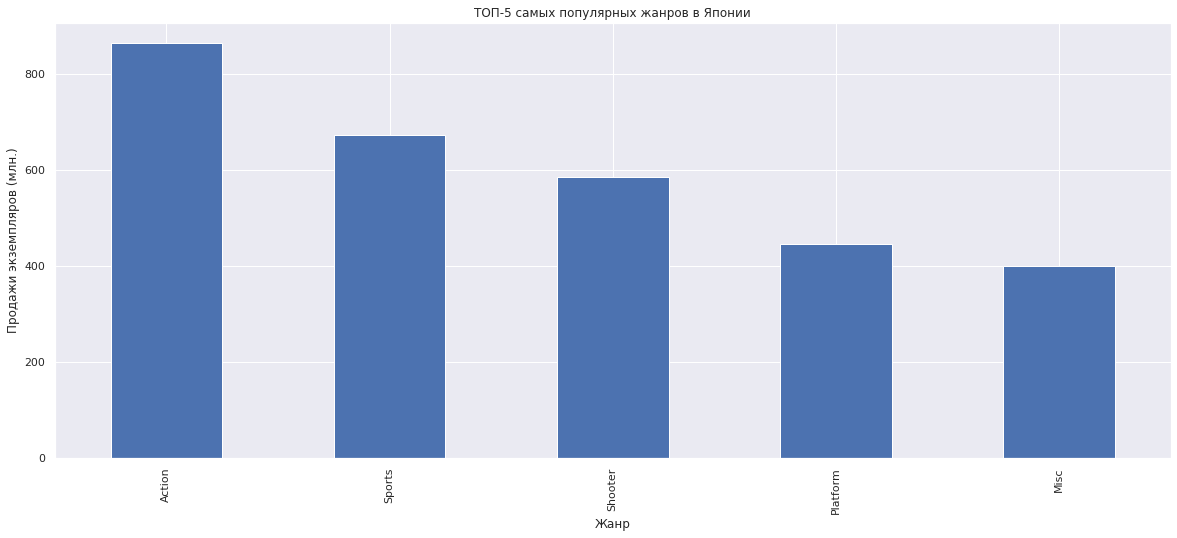

In [44]:
# ТОП-5 самых популярных жанров в Японии
# группируем по жанрам
genre_jp = df_sum.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
# построим гистограмму
genre_jp.plot(x = 'genre', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Японии')
# меняем наименование горизонтальной линии ('X')
plt.xlabel('Жанр')
# меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Вывод:
Самые популярные платформы (топ-5).
- CША: PS4, XOne, 3DS, WiiU, PC
- Европа: PS4, XOne, PC, 3DS, WiiU 
- Япония: 3DS, PS4, PSV, PS3, WiiU 

Самые популярные жанры (топ-5)
- CША: Shooter, Action, Sports, Role-Playing, Fighting 
- Европа: Shooter, Sports, Action, Role-Playing, Racing 
- Япония: Action, Sports, Adventure, Shooter, Misc 


Проверим Влияние рейтинга ESRB на продажи в отдельном регионе.



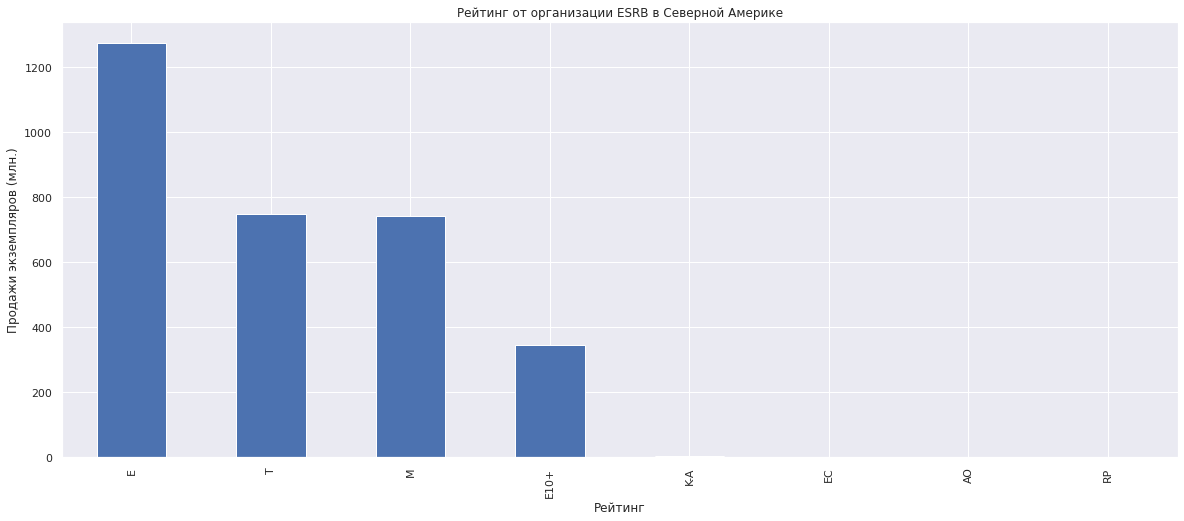

In [45]:
#  Рейтинг от организации ESRB в Северной Америке
# группируем по жанрам
rating_na = df_sum.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
# построим гистограмму
rating_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Северной Америке')
# меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
# меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Северной Америке самые высокие рейтинги у жанра E.

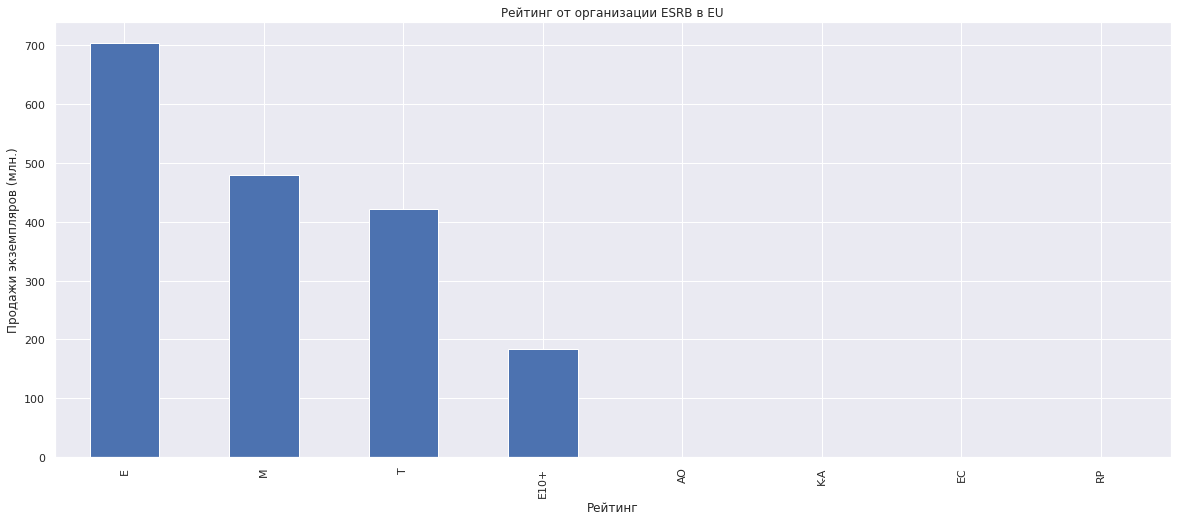

In [46]:
#  Рейтинг от организации ESRB в EU
# группируем по жанрам
rating_eu = df_sum.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
# построим гистограмму
rating_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в EU')
# меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
# меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Северной Америке самые высокие рейтинги у жанра E.

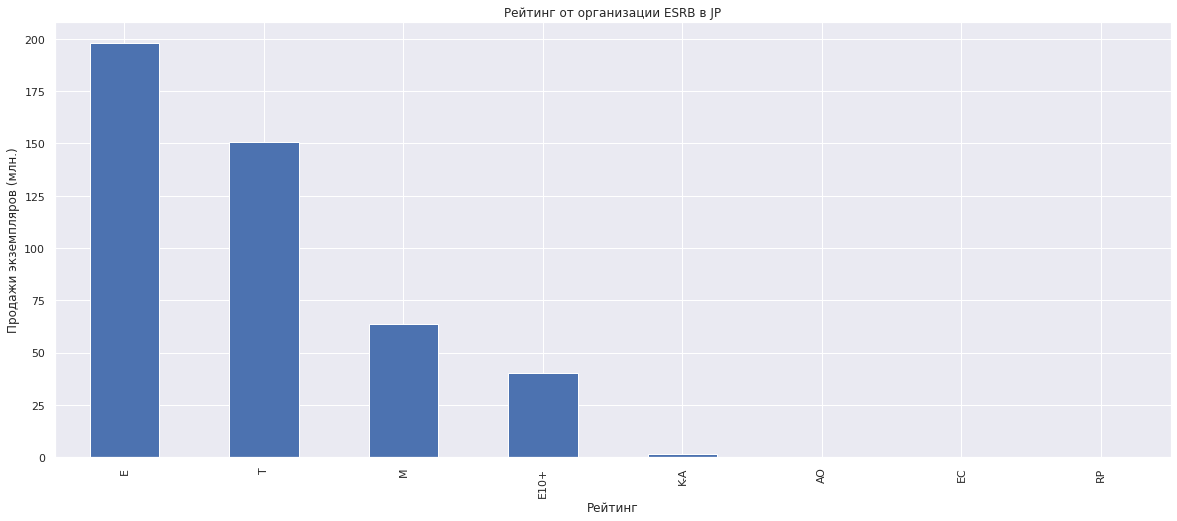

In [47]:
#  Рейтинг от организации ESRB в JP
# группируем по жанрам
rating_jp = df_sum.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
# построим гистограмму
rating_jp.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в JP')
# меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
# меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Японии самые высокие рейтинги у жанра E.

В этой части выделим ТОП-5 самых популярных и непопулярных платформ и жанров.
Можем выделить, что каждый регион отличается топовыми позициями. Для примера разберем первые места.

По нашей таблице:

Рейтинг по платформам:
 - в Северной Америке - Xbox One
 - в Европе - PS4
 - в Японии - PS4
 

Рейтинг по жанрам:
 - в Северной Америке - Fighting
 - в Европе - Shooter
 - в Японии - Role-Playing


Рейтинг от организации ESRB:
 - в Северной Америке - F
 - в Европе - S
 - в Японии - E

В итоге, пользователи Европы и Штатов любят "шутеры", и "Файтеры" что соответствует платформе PS4 и XOne, но американские пользователи предпочитают "экшен" жанр - спортивномe, в топе у европейцев входят "гонки", а у представителей штатов "файтинги". Портрет японского игрока полностью отличается, т.к. главный игровой жанр - "экшен", а основная консоль - PS4. Но некоторые платформы имеют множество жанров, что позволяет покрыть потребности разных регионов. Рейтинг ESRB влияет на европейских и американских игроков, кроме региона - Япония.

Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для проверки гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" в качестве нулевой и альтернативной гипотезы мы взяли следующее:
H0: средние рейтинги по платформам одинаковые
H1: средние рейтинги по платформам разные

In [77]:


data_x_one = df[df['platform'] == 'XOne']

data_x_one
data_pc = df[df['platform'] == 'PC']
# обозначили две выборки конкретных столбцов с пользовательскими рейтингами.
xbox_1 = data_x_one['user_score']
pc_1 = data_pc['user_score']
 # критический уровень статистической значимости
alpha = .05
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(xbox_1, pc_1)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):

  print("Отвергаем нулевую гипотезу")
else:

  print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3037979620149106e-05
Отвергаем нулевую гипотезу


p-значение: 1.3037979620149106e-05
Отвергаем нулевую гипотезу, рейтинги платформ Xbox One и PC разные.
При проведении статистического теста по всему периоду, получилось, что рейтинги платформ разные и нулевая гипотеза отвергалась.

Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

Рейтинг жанров мы уже будем делать по нашей выборке

Для проверки гипотезы "средние пользовательские рейтинги жанров Action и Sports разные" в качестве нулевой и альтернативной гипотезы мы взяли следующее:
H0: средние рейтинги по жанрам одинаковые
H1: средние рейтинги по жанрам разные

In [68]:
data_action = df[df['genre'] == 'Action']
data_sports = df[df['genre'] == 'Sports']
action_a = data_action['user_score']
sports_b = data_sports['user_score']
# Зададим критический уровень статистической значимости
alpha = .05 
# если p-value окажется меньше него - отвегнем гипотезу
results = st.ttest_ind(action_a, sports_b)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
  print("Отвергаем нулевую гипотезу")
else:
  print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


p-значение: 0.06480928064420527
Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports равные.
При проведении статистического теста по всему периоду, получилось, что рейтинги жанров action и sports разные и нулевая гипотеза подтвердилась

Проведя анализ предоставленого датасета по продажам игр, в которой из нескольких таблиц мы подготовили и сделали выгрузку. Подробно о каждом этапе есть вывод, можете с ними ознакомиться. 

По итогам можно сделать прогноз на 2017 год в игровой индустрии.

Был анализирован период с 2015-2016 года, и в этот период для диагностики у нас были выбраны 2 платформы: PS4 и Xbox One, которые на этот момент обладали самыми большими продажами и были ТОП.

Самыми популярными платформами на рынке в мире являются - PS4, т.к. из из всех стран, в Северной Америке - Xbox One.

Жанры игр страны предпочитают разные, ниболее популярный жанр Shooter. Также в ТОП жанров попали такие как: Fighting (в Северной Америке), Role-Playing (в Японии).

ТОП рейтинг от организации ESRB можно твердо считать категорию E.

Из анализа следует, что на следующий год максимум продаж ожидается на платформу PS4, т.к. она популярна в большинстве стран мира. В жанрах ТОП Shooter, а также остальные два жанра, т.к. они захватываю две большие страны. Возрастная категория M пользуется большим спросом на рынке.

В конце проекта нам необходимо было проверить две гипотезы: "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "средние пользовательские рейтинги жанров Action и Sports разные". Итог можно сделать следующий: средние пользовательские рейтинги платформ разные, и средние пользовательские рейтинги по жанрам разные.

https://gist.github.com/vovlov/80c4ad5bcdf0446309ef664cfacb6885

https://itnan.ru/post.php?c=1&p=674720

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html